<div style="display: flex, justify-content: center"> 
<h1 style="text-align: center; padding: 25px ;border: solid; background-color: blue; font-size: 30px  "> Models de Classification </h1> 
</div>

<div style='text-align: center;padding: 15px; color:blue; font-size:18px'> <b> Etude et comparaison entre 3 modèles de classification </b> <br>
<i style='color:blue; font-size:15px'> Dummy Classifier, Régression logistique, Arbre de décision,  </i>
</div>

In [1]:
# Tous les imports ici
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
    confusion_matrix, classification_report

from sklearn.metrics import roc_auc_score, plot_roc_curve, roc_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve

from sklearn.model_selection import learning_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

from sklearn.inspection import permutation_importance

#import warnings
#warnings.simplefilter(action="ignore")

In [2]:
data = pd.read_pickle('./data/data_bank.pkl')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 51 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   bank_account                                     23524 non-null  object 
 1   household_size                                   23524 non-null  int64  
 2   age_of_respondent                                23524 non-null  int64  
 3   country_Kenya                                    23524 non-null  float64
 4   country_Rwanda                                   23524 non-null  float64
 5   country_Tanzania                                 23524 non-null  float64
 6   country_Uganda                                   23524 non-null  float64
 7   year_2016                                        23524 non-null  float64
 8   year_2017                                        23524 non-null  float64
 9   year_2018                   

In [37]:
df = pd.DataFrame(data)

In [27]:
#Je regarde la répartition des data de ma target 
df1 = df['bank_account'].value_counts()
df1

No     20212
Yes     3312
Name: bank_account, dtype: int64

/tmp/ipykernel_564/3699141928.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target.replace(to_replace=[1,0], value= ['Yes','No'], inplace = True)


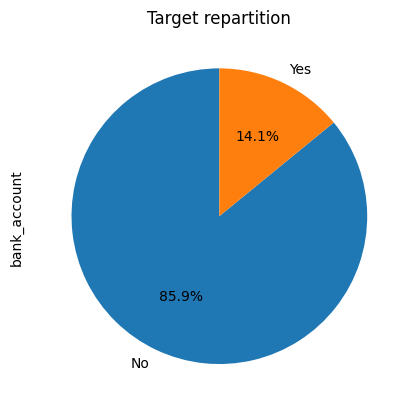

In [6]:
fig1=plt.figure()
ax1=plt.axes()
target = df['bank_account']
target.replace(to_replace=[1,0], value= ['Yes','No'], inplace = True)
plt.title('Target repartition')
target.value_counts().plot.pie(startangle=90, autopct='%1.1f%%')
plt.show()

In [38]:
df = df.drop(['bank_account','bank_account_No'], axis=1)
df

,household_size,age_of_respondent,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,year_2016,year_2017,year_2018,bank_account_Yes,...,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,3,24,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,5,70,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,5,26,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,5,34,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8,26,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,4,48,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
23520,2,27,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
23521,5,27,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
23522,7,30,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<div style="display: flex, justify-content: center"> 
<h2 style="text-align: center; padding: 25px ;border: inset; border-color: blue;"> Normalisation des données </h2> 
</div>

In [30]:
# Je definie y et X
y = df['bank_account_Yes']
X = df.drop('bank_account_Yes', axis=1)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=3)

In [79]:
# pipeline dummyclassifier
model1 = make_pipeline(MinMaxScaler(), DummyClassifier(strategy="stratified"))
model1.fit(X_train,y_train)
print('le score du modèle est :', model1.score(X_train,y_train))

le score du modèle est : 0.7613871006923357


In [50]:
# pipeline regression logistique
model2 = make_pipeline(MinMaxScaler(), LogisticRegression())
model2.fit(X_train, y_train)
print('le score du modèle est :', model2.score(X_train,y_train))

le score du modèle est : 0.8869184987246447


/home/laura/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
# pipeline decisiontreeclassifier
model3 = make_pipeline(MinMaxScaler(), DecisionTreeClassifier())
model3.fit(X_train, y_train)
print('le score du modèle est :', model3.score(X_train,y_train))

le score du modèle est : 0.9817806388922629


In [41]:
 def evaluate_model(model, X_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(X_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [71]:
dummy_scale = evaluate_model(model1, X_test, y_test )

In [70]:
reg_logistique = evaluate_model(model2, X_test, y_test )

In [72]:
decision_tree = evaluate_model(model3, X_test, y_test )

In [80]:
table = [dummy_scale, reg_logistique, decision_tree]

In [88]:
pd.DataFrame(table).T

,0,1,2
acc,0.757863,0.881411,0.829413
prec,0.15377,0.679012,0.403403
rec,0.153314,0.326409,0.398615
f1,0.153541,0.440882,0.400995
kappa,0.012267,0.383548,0.301544
fpr,"[0.0, 0.1387464858607574, 1.0]","[0.0, 0.0, 0.0, 0.000165371258475277, 0.000165...","[0.0, 0.09723829998346288, 0.09740367124193815..."
tpr,"[0.0, 0.13452027695351138, 1.0]","[0.0, 0.0009891196834817012, 0.013847675568743...","[0.0, 0.39564787339268054, 0.39663699307616224..."
auc,0.497887,0.852931,0.651496
cm,"[[5194, 853], [856, 155]]","[[5891, 156], [681, 330]]","[[5451, 596], [608, 403]]"
